In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [41]:
data=pd.read_csv('3.01. Country clusters.csv')

In [42]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


(-90, 90)

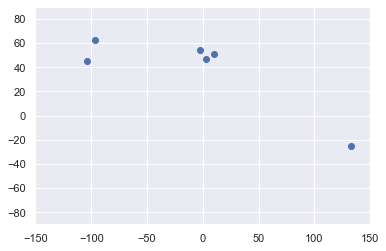

In [43]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-150,150)
plt.ylim(-90,90)

In [44]:
x=data.iloc[:,1:3]

In [45]:
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [46]:
kmeans=KMeans(3)

In [47]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [54]:
kmeans.inertia_

288.1052333333333

In [56]:
wcss=[]
for i in range(1,7):
    kmeans=KMeans(i)
    kmeans.fit(x)
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)

In [57]:
wcss

[42601.91356666667,
 13205.758119999999,
 288.1052333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

In [58]:
number_cluster=range(1,7)

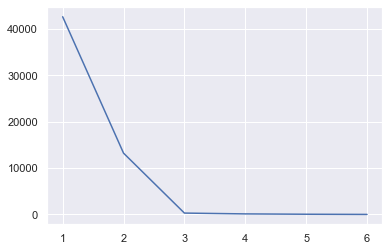

In [59]:
plt.plot(number_cluster,wcss)

In [48]:
identified_clusters=kmeans.fit_predict(x)

In [49]:
identified_clusters

array([2, 2, 1, 1, 1, 0])

In [50]:
data_with_cluster=data.copy()

In [51]:
data_with_cluster['Clusters']=identified_clusters

In [52]:
data_with_cluster

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,0


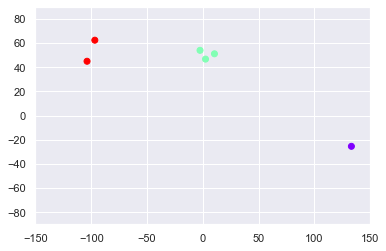

In [53]:
plt.scatter(data_with_cluster['Longitude'],data_with_cluster['Latitude'],c=data_with_cluster['Clusters'],cmap='rainbow')
plt.xlim(-150,150)
plt.ylim(-90,90)
plt.show()